In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# Predicción continua

In [8]:
data = pd.read_csv("1 - regresion - House Price.csv",delimiter = ";")

In [9]:
data.head()

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,bsmt,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long
0,7129300520,20141013T000000,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,0,1955,59,0,0,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,2014,538000.0,3,2.25,2570,7242,1690,7639,...,1,400,1951,63,1991,1,23,98125,47.7210,-122.319
2,5631500400,20150225T000000,2015,180000.0,2,1.00,770,10000,2720,8062,...,0,0,1933,82,0,0,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,2014,604000.0,4,3.00,1960,5000,1360,5000,...,1,910,1965,49,0,0,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,2015,510000.0,3,2.00,1680,8080,1800,7503,...,0,0,1987,28,0,0,0,98074,47.6168,-122.045


## Regresión Lineal Simple

In [ ]:
data = pd.read_csv("regresion - House Price.csv",delimiter = ";")

### Limpieza de datos

In [4]:
data.isnull().sum()

id               0
date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
sqft_living15    0
sqft_lot15       0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
bsmt             0
sqft_bsmt        0
yr_built         0
age              0
yr_renovated     0
renov            0
age_renov        0
zipcode          0
lat              0
long             0
dtype: int64

En caso de que exista alguna columna de fecha que no esté en formato fecha, cambiar a formato fecha

In [11]:
print(data.dtypes)

id                        int64
date             datetime64[ns]
year                      int64
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
sqft_living15             int64
sqft_lot15                int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
bsmt                      int64
sqft_bsmt                 int64
yr_built                  int64
age                       int64
yr_renovated              int64
renov                     int64
age_renov                 int64
zipcode                   int64
lat                     float64
long                    float64
dtype: object


In [143]:
data["date"]= pd.to_datetime(data["date"], dayfirst=True)

### Análisis exploratorio

Graficar matriz de correlación. Cuales son las variables que no influyen en el precio

In [144]:
matriz_correlacion = data.corr()

In [145]:
matriz_correlacion.head().round(2)

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,age,yr_renovated,renov,age_renov,zipcode,lat,long,Prices_pred,Prices_pred_manual,error_cuadratico
id,1.00,0.01,0.01,-0.02,0.00,0.01,-0.01,-0.13,-0.00,-0.14,...,-0.02,-0.02,-0.02,-0.02,-0.01,-0.00,0.02,-0.01,-0.01,-0.00
date,0.01,1.00,0.85,-0.00,-0.02,-0.03,-0.03,0.01,-0.03,0.00,...,0.01,-0.02,-0.02,-0.01,0.00,-0.03,-0.01,-0.03,-0.03,0.01
year,0.01,0.85,1.00,0.00,-0.01,-0.03,-0.03,0.01,-0.02,-0.00,...,0.01,-0.02,-0.02,-0.01,0.00,-0.03,0.00,-0.03,-0.03,0.01
price,-0.02,-0.00,0.00,1.00,0.31,0.53,0.70,0.09,0.59,0.08,...,-0.05,0.13,0.13,0.07,-0.05,0.31,0.02,0.70,0.70,0.63
bedrooms,0.00,-0.02,-0.01,0.31,1.00,0.52,0.58,0.03,0.39,0.03,...,-0.15,0.02,0.02,-0.01,-0.15,-0.01,0.13,0.58,0.58,0.12


In [21]:
filtro = matriz_correlacion["price"].abs() < 0.2
matriz_filtro= matriz_correlacion.loc[filtro, filtro].round(2)

In [19]:
matriz_filtro

id             -0.02
date           -0.00
year            0.00
sqft_lot        0.09
sqft_lot15      0.08
condition       0.04
bsmt            0.18
yr_built        0.05
age            -0.05
yr_renovated    0.13
renov           0.13
age_renov       0.07
zipcode        -0.05
long            0.02
Name: price, dtype: float64

<Axes: >

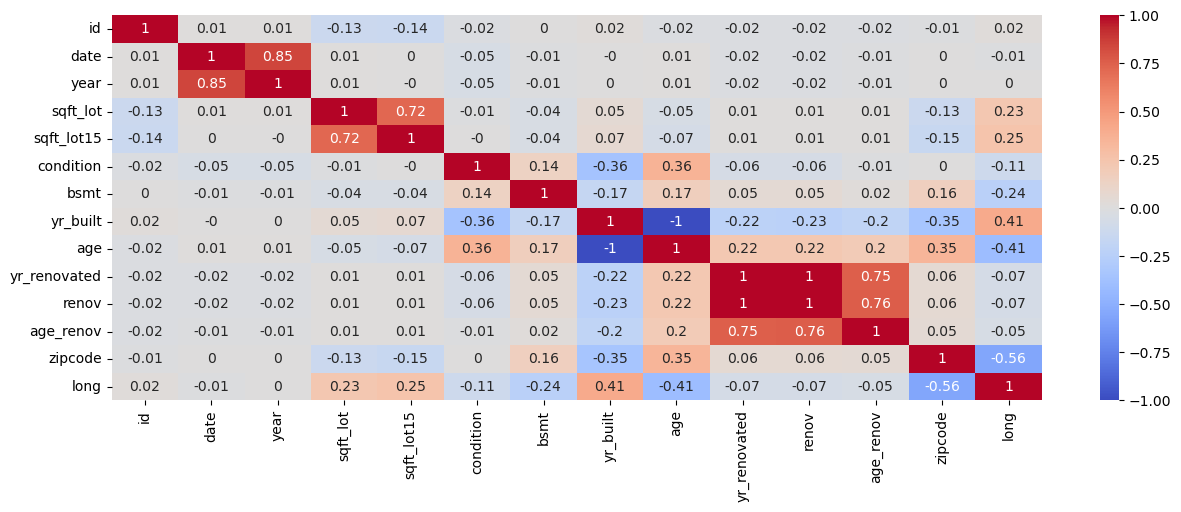

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(matriz_filtro, cmap = "coolwarm", annot = True)

Realizar la matriz de correlación excluyendo a estas variables poco significativas

In [48]:
filtro = matriz_correlacion["price"].abs() > 0.2
matriz_filtro= matriz_correlacion.loc[filtro, filtro].round(2)

<Axes: >

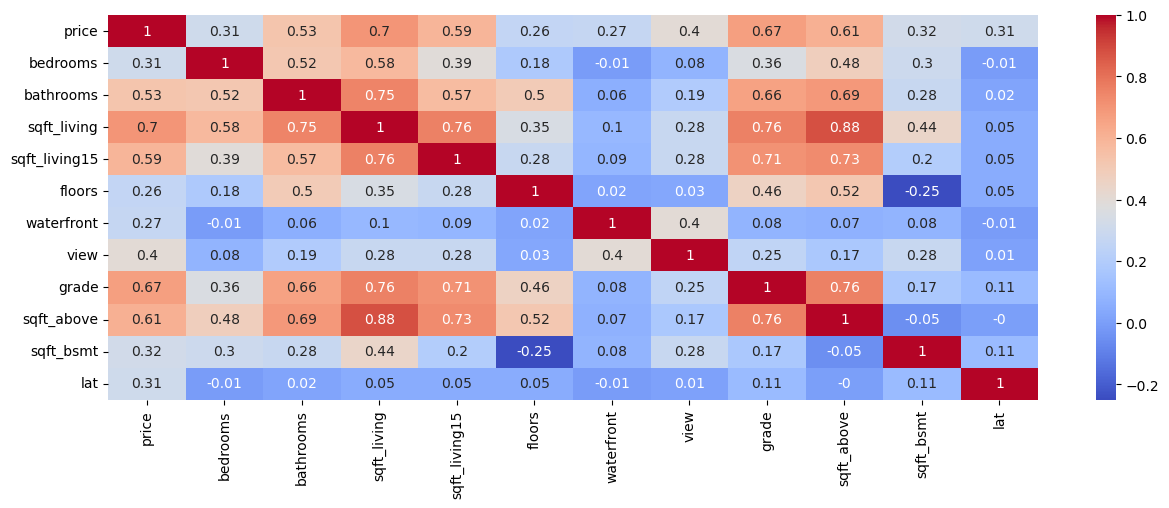

In [17]:
plt.figure(figsize=(15,5))
sns.heatmap(matriz_filtro, cmap = "coolwarm", annot = True)

Realizar un scatter plot de las tres variables con mayor coeficiente de correlación en función del precio.

In [69]:
matriz_filtro["price"].sort_values(ascending=False).iloc[1:].head(3)

sqft_living    0.70
grade          0.67
sqft_above     0.61
Name: price, dtype: float64

<Axes: xlabel='sqft_living', ylabel='price'>

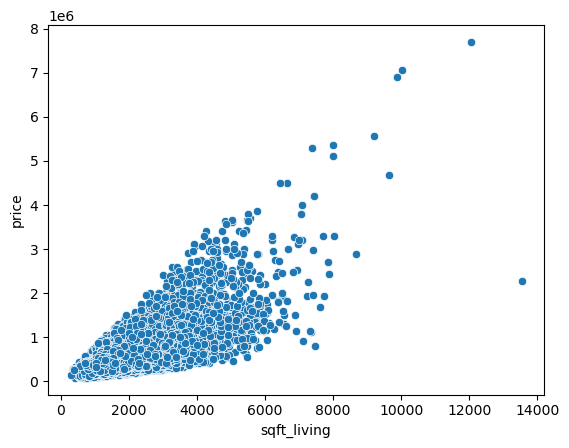

In [68]:
sns.scatterplot(data = data, x = "sqft_living", y = "price")

<Axes: xlabel='sqft_above', ylabel='price'>

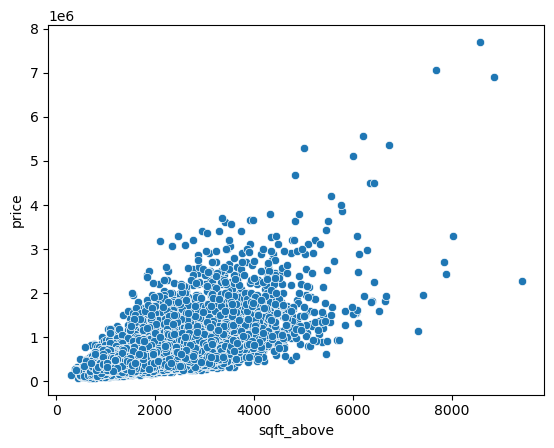

In [71]:
sns.scatterplot(data = data, x = "sqft_above", y = "price")

<Axes: xlabel='sqft_above', ylabel='sqft_living'>

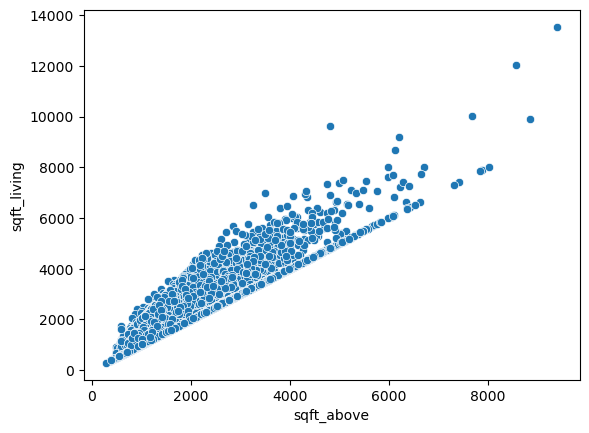

In [24]:
sns.scatterplot(data = data, x = "sqft_above", y = "sqft_living")

In [73]:
data["sqft_living"].corr(data["sqft_above"])

0.8765965986813181

### Analisis predictivo

Realizar una regresión lineal para predecir el precio de las propiedades con sqft_living 

In [25]:
import statsmodels.formula.api as smf

In [26]:
lm = smf.ols(formula = "price~sqft_living", data = data).fit()

Cuanto es el R^2 del modelo?

In [27]:
lm.rsquared

0.49286538652201417

In [86]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:38:33   Log-Likelihood:            -3.0028e+05
No. Observations:               21613   AIC:                         6.006e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.387e+04   4405.455     -9.958      0.000   -5.25e+04   -3.52e+04
sqft_living   280.8067      1.938    144.924      0.000     277.009     284.605
==============================================================================
Omnibus:                    14815.593   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           543533.863
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.911   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Agregar a la tabla la columna con las predicciones de los precios en función del sqft_living

In [31]:
data["Prices_pred"] = lm.predict(data.sqft_living)

In [89]:
data.head()

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,sqft_bsmt,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long,Prices_pred
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1340,5650,...,0,1955,59,0,0,0,98178,47.5112,-122.257,287484.292583
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,1690,7639,...,400,1951,63,1991,1,23,98125,47.7210,-122.319,677805.591585
2,5631500400,2015-02-25,2015,180000.0,2,1.00,770,10000,2720,8062,...,0,1933,82,0,0,0,98028,47.7379,-122.233,172353.549712
3,2487200875,2014-12-09,2014,604000.0,4,3.00,1960,5000,1360,5000,...,910,1965,49,0,0,0,98136,47.5208,-122.393,506513.510728
4,1954400510,2015-02-18,2015,510000.0,3,2.00,1680,8080,1800,7503,...,0,1987,28,0,0,0,98074,47.6168,-122.045,427887.637548


Graficar en un mismo gráfico el precio en función de sqft_living (scatter) y la predicción del precio en función de sqft_living (line)

<Axes: xlabel='sqft_living', ylabel='Prices_pred'>

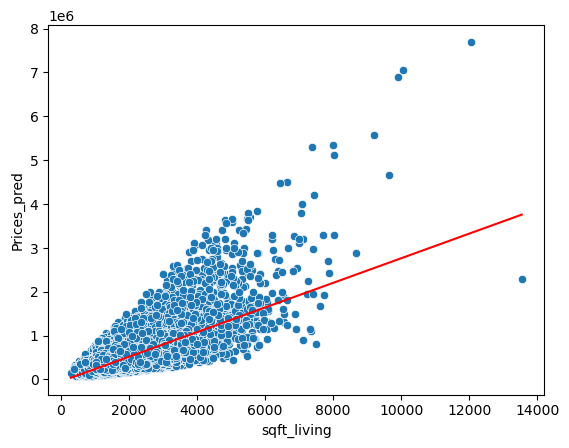

In [32]:
sns.lineplot(data = data, x = "sqft_living", y = "Prices_pred", color = "red")
sns.scatterplot(data = data, x = "sqft_living", y = "price")

Agregar una columna que sea la predicción del precio calculado manualmente a partir de los parámetros del modelo

In [96]:
lm.params

Intercept     -43867.601534
sqft_living      280.806690
dtype: float64

In [33]:
data["Prices_pred_manual"] = -43867.601534 + 280.806690 * data["sqft_living"]

In [98]:
data.head()

,id,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_living15,sqft_lot15,...,yr_built,age,yr_renovated,renov,age_renov,zipcode,lat,long,Prices_pred,Prices_pred_manual
0,7129300520,2014-10-13,2014,221900.0,3,1.00,1180,5650,1340,5650,...,1955,59,0,0,0,98178,47.5112,-122.257,287484.292583,287484.292666
1,6414100192,2014-12-09,2014,538000.0,3,2.25,2570,7242,1690,7639,...,1951,63,1991,1,23,98125,47.7210,-122.319,677805.591585,677805.591766
2,5631500400,2015-02-25,2015,180000.0,2,1.00,770,10000,2720,8062,...,1933,82,0,0,0,98028,47.7379,-122.233,172353.549712,172353.549766
3,2487200875,2014-12-09,2014,604000.0,4,3.00,1960,5000,1360,5000,...,1965,49,0,0,0,98136,47.5208,-122.393,506513.510728,506513.510866
4,1954400510,2015-02-18,2015,510000.0,3,2.00,1680,8080,1800,7503,...,1987,28,0,0,0,98074,47.6168,-122.045,427887.637548,427887.637666


Calcular el error cuadrático medio del modelo

In [45]:
data["error_cuadratico"] = (data.price - data.Prices_pred_manual)**2
error_cuadratico_medio = data.error_cuadratico.mean()

 Calcular el error promedio del modelo

In [46]:
# nos dice en promedio lo que nos hemos equivocado de nuestro modelo para arriba o abajo
error_promedio = np.sqrt(error_cuadratico_medio)
error_promedio

261605.02641474584

In [47]:
error_promedio/data.price.mean()

0.48429038641174293

## Regresión Lineal Múltiple

In [146]:
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

In [147]:
#Asumir que el DATAFRAME es > 0.2
filtro = matriz_correlacion["price"].abs() > 0.2
matriz_filtro= matriz_correlacion.loc[filtro, filtro].round(2)

<Axes: >

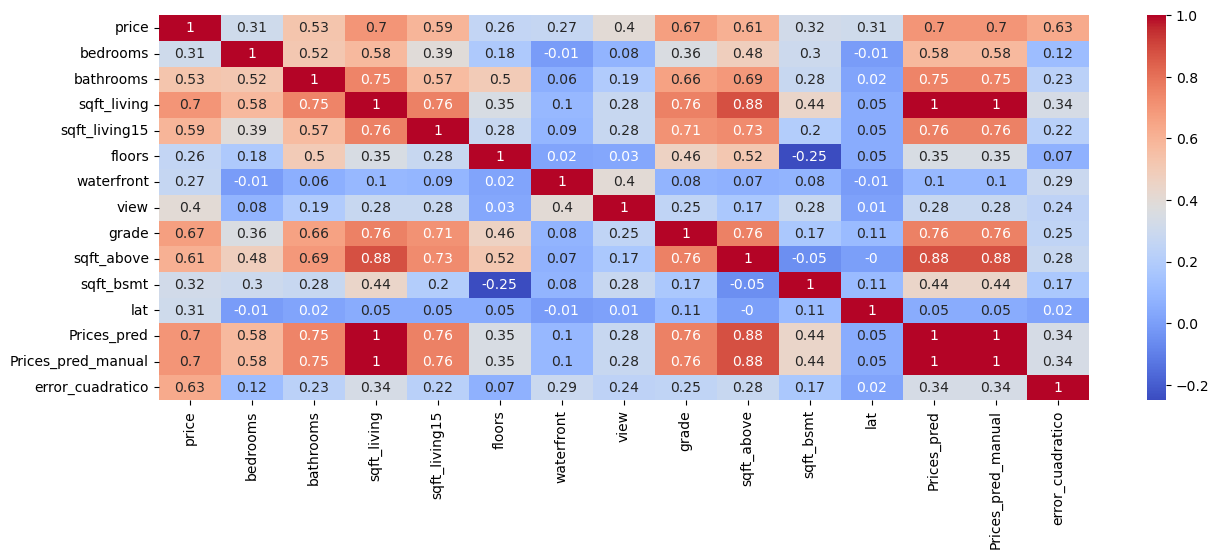

In [148]:
plt.figure(figsize=(15,5))
sns.heatmap(matriz_filtro, cmap = "coolwarm", annot = True)

### Dividir datos en testing y training

In [149]:
data.shape

(21613, 29)

In [150]:
matriz_filtro.head()

,price,bedrooms,bathrooms,sqft_living,sqft_living15,floors,waterfront,view,grade,sqft_above,sqft_bsmt,lat,Prices_pred,Prices_pred_manual,error_cuadratico
price,1.00,0.31,0.53,0.70,0.59,0.26,0.27,0.40,0.67,0.61,0.32,0.31,0.70,0.70,0.63
bedrooms,0.31,1.00,0.52,0.58,0.39,0.18,-0.01,0.08,0.36,0.48,0.30,-0.01,0.58,0.58,0.12
bathrooms,0.53,0.52,1.00,0.75,0.57,0.50,0.06,0.19,0.66,0.69,0.28,0.02,0.75,0.75,0.23
sqft_living,0.70,0.58,0.75,1.00,0.76,0.35,0.10,0.28,0.76,0.88,0.44,0.05,1.00,1.00,0.34
sqft_living15,0.59,0.39,0.57,0.76,1.00,0.28,0.09,0.28,0.71,0.73,0.20,0.05,0.76,0.76,0.22


In [151]:
X = data[["bedrooms","bathrooms","sqft_living","sqft_living15", "floors","waterfront","view","grade","sqft_above","sqft_bsmt", "lat"]]
y = data["price"]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25
)

In [153]:
X_train.shape

(16209, 11)

In [154]:
X_test.shape

(5404, 11)

In [155]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_living15,floors,waterfront,view,grade,sqft_above,sqft_bsmt,lat
20838,6,5.25,6160,4225,2.0,0,0,11,4040,2120,47.6094
18469,2,1.00,890,1010,1.0,0,0,7,890,0,47.7027
841,3,1.00,1340,1020,1.0,0,0,7,940,400,47.7321
6157,4,2.50,2620,2640,2.0,0,0,9,2620,0,47.5524
16247,4,1.75,1650,1620,1.0,0,0,7,1100,550,47.3944
...,...,...,...,...,...,...,...,...,...,...,...
18817,3,1.75,1880,1260,1.0,0,0,7,880,1000,47.7004
11240,3,2.50,1560,1560,2.0,0,0,7,1560,0,47.3838
15519,2,1.00,960,1020,1.0,0,0,6,960,0,47.4122
1330,5,2.25,2100,2100,1.0,0,0,8,1600,500,47.6737


### Análisis de Multicolinealidad

Calcular el determinante de la matriz de correlación y determinar si hay multicolinealidad

In [156]:
np.linalg.det(X.corr())

-9.381538718966942e-17

In [157]:
np.linalg.det(X.corr().round())

0.0

Analizar VIF de variables relevantes

In [163]:
acum = {}

for i in X_train:
    X_vif = X_train.drop(columns=i)
    y_vif = X_train[i]

    lm = LinearRegression()
    lm.fit(X_vif, y_vif)

    r_2 = lm.score(X_vif, y_vif)

    if r_2 == 1:
        VIF = np.inf
    else:
        VIF = 1 / (1 - r_2)

    acum[i] = VIF

In [164]:
acum

{'bedrooms': 1.6164288809060692,
 'bathrooms': 2.9733076463296513,
 'sqft_living15': 2.7879622759295324,
 'floors': 1.8490414199457565,
 'waterfront': 1.1848523721166553,
 'view': 1.3584359791733904,
 'grade': 3.1499113216186574,
 'sqft_above': 4.62723777780438,
 'sqft_bsmt': 1.8971732108079495,
 'lat': 1.0487059080602648}

Eliminar variables con VIF mayor a 5 y recalcular. Eliminar variable de a una y verificar si se corrije el VIF del resto antes de eliminar otra

In [159]:
print(X_train.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_bsmt', 'lat'],
      dtype='object')


In [160]:
X_train = X_train.drop(columns="sqft_living")

In [161]:
X_test = X_test.drop(columns="sqft_living")

Seleccionar variables a utilizar en el modelo con LinearRegression y RFE y luego calcular el R^2 del modelo ajustado con los datos de training, y evaluarlo en los de testing

In [165]:
estimator = SVR(kernel="linear")

In [205]:
selector = RFE(
    estimator=LinearRegression(),
    n_features_to_select = 10
)
selector = selector.fit(X_train, y_train)
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [206]:
X_train_final = X_train.loc[:, selector.support_] 
X_test_final = X_test.loc[:, selector.support_]

Crear modelo de regresión con columnas finales

In [207]:
lm = LinearRegression()
lm.fit(X_train_final, y_train)

LinearRegression()

In [1]:
lm.score(X_test_final, y_test)

NameError: name 'lm' is not defined